# CEW (Closed Eyes in the Wild) CNN

### 论文复现

黄洁媛, 岑翼刚, 张琳娜, et al. 基于卷积神经网络的人眼状态检测[J]. 扬州大学学报(自然科学版), 2018, 21(03):28-32+37.

In [1]:
from keras.models import *
from keras.layers import *
from keras.activations import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import to_categorical

Using TensorFlow backend.


### 读入数据集

In [2]:
import numpy as np

data = np.load('cew-all-in-one.npz')

x_train: np.ndarray = data['x_train']
y_train: np.ndarray = data['y_train']
x_test: np.ndarray = data['x_test']
y_test: np.ndarray = data['y_test']

### 改变形状、缩放值

In [3]:
x_train = x_train.reshape((-1, 24, 24, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((-1, 24, 24, 1))
x_test = x_test.astype('float32') / 255

### 标签分类编码

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 网络结构

In [5]:
model = Sequential()

model.add(Conv2D(32, (5, 5), activation=relu, input_shape=(24, 24, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((3, 3), strides=2, padding='same'))

model.add(Conv2D(64, (5, 5), activation=relu))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2))

model.add(GlobalAvgPool2D())
model.add(Dropout(0.5))

model.add(Dense(128, activation=relu))
model.add(Dropout(0.5))

model.add(Dense(2, activation=softmax))

### 模型结构

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

### 编译步骤

损失函数、优化器、监控指标

In [7]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

### 模型拟合

In [8]:
epochs = 100
log = model.fit(x_train, y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(x_test, y_test))

Train on 7344 samples, validate on 1640 samples
Epoch 1/100
7344/7344 [==============================] - 3s 475us/step - loss: 0.4208 - acc: 0.8228 - val_loss: 0.9422 - val_acc: 0.7659
Epoch 2/100
7344/7344 [==============================] - 2s 227us/step - loss: 0.2149 - acc: 0.9137 - val_loss: 0.2759 - val_acc: 0.8774
Epoch 3/100
7344/7344 [==============================] - 2s 229us/step - loss: 0.1905 - acc: 0.9246 - val_loss: 0.2006 - val_acc: 0.9238
Epoch 4/100
7344/7344 [==============================] - 2s 226us/step - loss: 0.1677 - acc: 0.9357 - val_loss: 0.2503 - val_acc: 0.9396
Epoch 5/100
7344/7344 [==============================] - 2s 227us/step - loss: 0.1571 - acc: 0.9394 - val_loss: 0.3294 - val_acc: 0.8921
Epoch 6/100
7344/7344 [==============================] - 2s 227us/step - loss: 0.1544 - acc: 0.9435 - val_loss: 0.2492 - val_acc: 0.8994
Epoch 7/100
7344/7344 [==============================] - 2s 229us/step - loss: 0.1372 - acc: 0.9465 - val_loss: 0.2424 - val_acc: 

### 绘制loss和accuracy

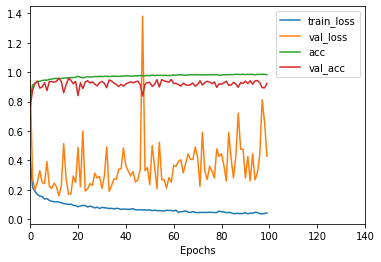

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.plot(log.history['loss'], label='train_loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.plot(log.history['acc'], label='acc')
plt.plot(log.history['val_acc'], label='val_acc')
plt.xlabel('Epochs')
plt.xlim((0, epochs + 40))
plt.legend(loc='upper right')
plt.show()